### R tutorial   

* Book:   
https://r4ds.had.co.nz/  
* Tidy R references   
https://tidyr.tidyverse.org/reference/

## Chapter 16: Dates and Times

### Create datetime 
* From a string.
* From individual date-time components.   
To create a date/time from this sort of input, use ```make_date()``` for dates, or ```make_datetime()``` for date-times:
* From an existing date/time object.
### Datetime components
* You can pull out individual parts of the date with the accessor functions ```year()```, ```month()```, ```mday()``` (day of the month), ```yday()``` (day of the year), ```wday()``` (day of the week), ```hour()```, ```minute()```, and ```second()```.
*  Round the date to a nearby unit of time, with ```floor_date()```, ```round_date()```, and ```ceiling_date()```.
* You can also use each accessor function to set the components of a date/time:

```R
(datetime <- ymd_hms("2016-07-08 12:34:56"))
#> [1] "2016-07-08 12:34:56 UTC"

year(datetime) <- 2020
```
* alternatively one can use ```update(datetime, year = 2020, month = 2, mday = 2, hour = 2)```
### Timespans
About how they interact with numerical operators see 16.4.4:   
https://r4ds.had.co.nz/dates-and-times.html
* **Durations**```as.duration()``` converts any time span to seconds.
 - different constructors of durations:
    ```R
    dseconds(15)
    #> [1] "15s"
    dminutes(10)
    #> [1] "600s (~10 minutes)"
    dhours(c(12, 24))
    #> [1] "43200s (~12 hours)" "86400s (~1 days)"
    ddays(0:5)
    #> [1] "0s"                "86400s (~1 days)"  "172800s (~2 days)"
    #> [4] "259200s (~3 days)" "345600s (~4 days)" "432000s (~5 days)"
    dweeks(3)
    #> [1] "1814400s (~3 weeks)"
    dyears(1)
    #> [1] "31536000s (~52.14 weeks)"
    ```
* **periods** human times
  - different constructors:
  ```R
    seconds(15)
    minutes(10)
    hours(c(12, 24))
    days(7)
    months(1:6)
    weeks(3)
    years(1)
  ```
* **intervals ```%--%```**
    ```R
    next_year <- today() + years(1)
    (today() %--% next_year) / ddays(1)
    #> [1] 366
    ```
### Time Zones
Unless otherwise specified, lubridate always uses UTC. UTC (Coordinated Universal Time) is the standard time zone used by the scientific community and roughly equivalent to its predecessor GMT (Greenwich Mean Time). 
* ```Sys.timezone()``` to find out my timezone   
* To see the list of timezones type in ```OlsonNames()```  
* To specify timezones use the above: 
    ```R
    (x1 <- ymd_hms("2015-06-01 12:00:00", tz = "America/New_York"))
    ```
* To display a time variable in a different timezone:
    ```R
    x4a <- with_tz(x4, tzone = "Australia/Lord_Howe")
    ```
* To forcefully modify the timezone of the time variable:
    ```R
    x4b <- force_tz(x4, tzone = "Australia/Lord_Howe")
    ```

In [13]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(lubridate))
suppressPackageStartupMessages(library(nycflights13))


In [4]:
class(today())
today()

[1] "Date"

[1] "2020-03-22"

In [5]:
class(now())
now()

[1] "POSIXct" "POSIXt"

[1] "2020-03-22 12:27:24 UTC"

### Create datetime 

In [9]:
# from a string
ymd("2017-01-31")
mdy("January 31st, 2017")
dmy("31-Jan-2017")


[1] "2017-01-31"

[1] "2017-01-31"

[1] "2017-01-31"

In [10]:
# number
ymd(20170131)


[1] "2017-01-31"

In [11]:
ymd_hms("2017-01-31 20:11:59")
mdy_hm("01/31/2017 08:01")

[1] "2017-01-31 20:11:59 UTC"

[1] "2017-01-31 08:01:00 UTC"

In [12]:
class(ymd(20170131, tz = "UTC"))
ymd(20170131, tz = "UTC")

[1] "POSIXct" "POSIXt"

[1] "2017-01-31 UTC"

In [20]:
# individual components
flights %>% 
  select(year, month, day, hour, minute, dep_time) %>%
    head()

year,month,day,hour,minute,dep_time
<int>,<int>,<int>,<dbl>,<dbl>,<int>
2013,1,1,5,15,517
2013,1,1,5,29,533
2013,1,1,5,40,542
2013,1,1,5,45,544
2013,1,1,6,0,554
2013,1,1,5,58,554


In [17]:
# individual components
flights %>% 
  select(year, month, day, hour, minute) %>% 
  mutate(departure = make_datetime(year, month, day, hour, minute)) %>%
head()


year,month,day,hour,minute,departure
<int>,<int>,<int>,<dbl>,<dbl>,<dttm>
2013,1,1,5,15,2013-01-01 05:15:00
2013,1,1,5,29,2013-01-01 05:29:00
2013,1,1,5,40,2013-01-01 05:40:00
2013,1,1,5,45,2013-01-01 05:45:00
2013,1,1,6,0,2013-01-01 06:00:00
2013,1,1,5,58,2013-01-01 05:58:00


In [22]:
make_datetime_100 <- function(year, month, day, time) {
  make_datetime(year, month, day, time %/% 100, time %% 100)
}

(flights_dt <- flights %>% 
  filter(!is.na(dep_time), !is.na(arr_time)) %>% 
  mutate(
    dep_time = make_datetime_100(year, month, day, dep_time),
    arr_time = make_datetime_100(year, month, day, arr_time),
    sched_dep_time = make_datetime_100(year, month, day, sched_dep_time),
    sched_arr_time = make_datetime_100(year, month, day, sched_arr_time)
  ) %>% 
  select(origin, dest, ends_with("delay"), ends_with("time"))) %>%
    head()


origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
<chr>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>
EWR,IAH,2,11,2013-01-01 05:17:00,2013-01-01 05:15:00,2013-01-01 08:30:00,2013-01-01 08:19:00,227
LGA,IAH,4,20,2013-01-01 05:33:00,2013-01-01 05:29:00,2013-01-01 08:50:00,2013-01-01 08:30:00,227
JFK,MIA,2,33,2013-01-01 05:42:00,2013-01-01 05:40:00,2013-01-01 09:23:00,2013-01-01 08:50:00,160
JFK,BQN,-1,-18,2013-01-01 05:44:00,2013-01-01 05:45:00,2013-01-01 10:04:00,2013-01-01 10:22:00,183
LGA,ATL,-6,-25,2013-01-01 05:54:00,2013-01-01 06:00:00,2013-01-01 08:12:00,2013-01-01 08:37:00,116
EWR,ORD,-4,12,2013-01-01 05:54:00,2013-01-01 05:58:00,2013-01-01 07:40:00,2013-01-01 07:28:00,150


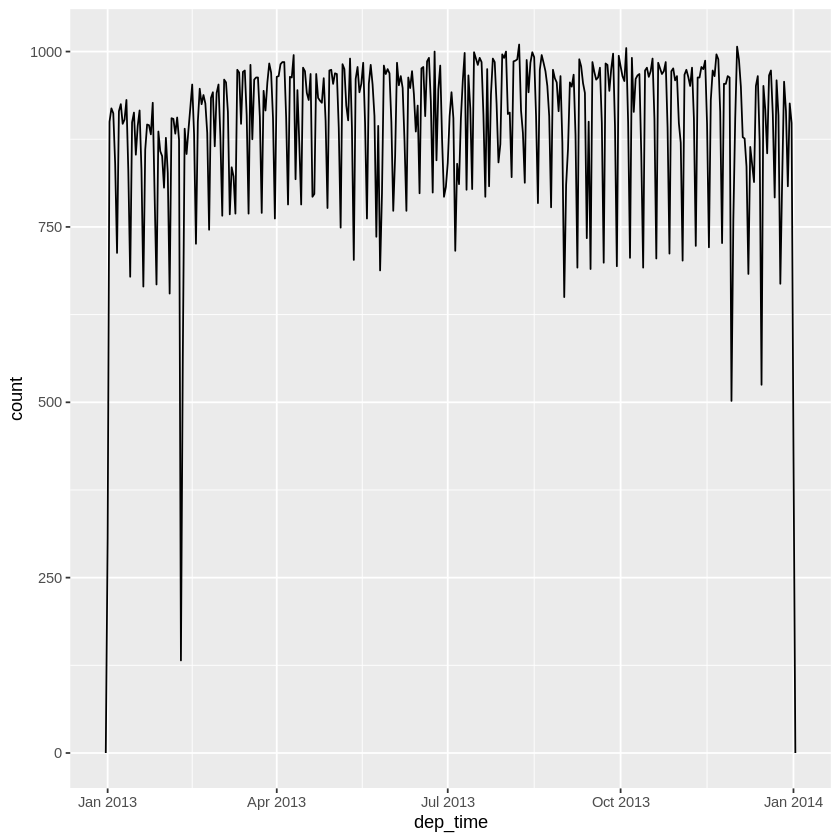

In [23]:
flights_dt %>% 
  ggplot(aes(dep_time)) + 
  geom_freqpoly(binwidth = 86400) # 86400 seconds = 1 day

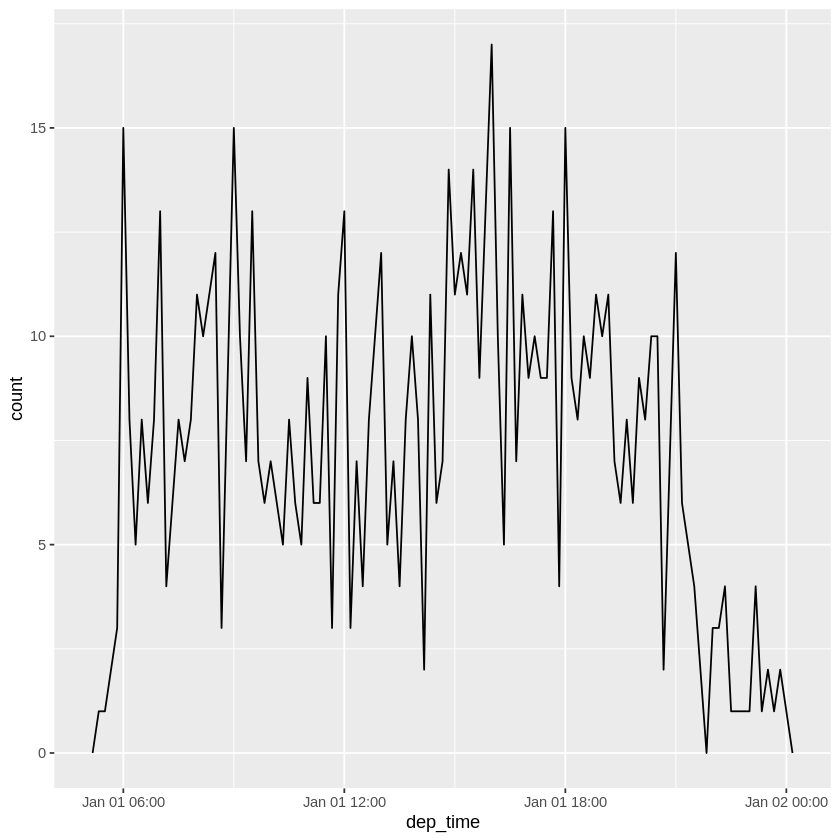

In [24]:
flights_dt %>% 
  filter(dep_time < ymd(20130102)) %>% 
  ggplot(aes(dep_time)) + 
  geom_freqpoly(binwidth = 600) # 600 s = 10 minutes

In [26]:
as_datetime(today())
as_date(now())

[1] "2020-03-22 UTC"

[1] "2020-03-22"

In [27]:
as_datetime(60 * 60 * 10)
as_date(365 * 10 + 2)

[1] "1970-01-01 10:00:00 UTC"

[1] "1980-01-01"

In [28]:
ymd(c("2010-10-10", "bananas"))

Warning message:
“ 1 failed to parse.”


[1] "2010-10-10" NA

In [29]:
d1 <- "January 1, 2010"
d2 <- "2015-Mar-07"
d3 <- "06-Jun-2017"
d4 <- c("August 19 (2015)", "July 1 (2015)")
d5 <- "12/30/14" # Dec 30, 2014

In [44]:
mdy(d1)
ymd(d2)
dmy(d3)
mdy(d4)
mdy(d5)

[1] "2010-01-01"

[1] "2015-03-07"

[1] "2017-06-06"

[1] "2015-08-19" "2015-07-01"

[1] "2014-12-30"

In [45]:
datetime <- ymd_hms("2016-07-08 12:34:56")

year(datetime)
month(datetime)
mday(datetime)
yday(datetime)
wday(datetime)


[1] 2016

[1] 7

[1] 8

[1] 190

[1] 6

In [46]:
month(datetime, label = TRUE)

wday(datetime, label = TRUE, abbr = FALSE)


[1] Jul
12 Levels: Jan < Feb < Mar < Apr < May < Jun < Jul < Aug < Sep < ... < Dec

[1] Friday
7 Levels: Sunday < Monday < Tuesday < Wednesday < Thursday < ... < Saturday

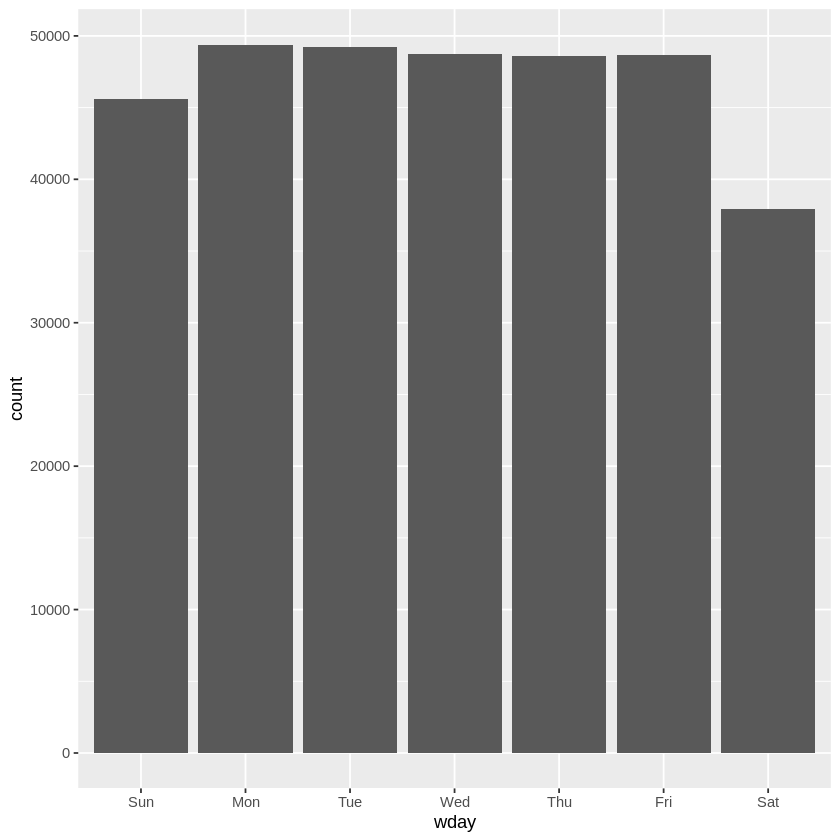

In [48]:
flights_dt %>% 
  mutate(wday = wday(dep_time, label = TRUE)) %>% 
  ggplot(aes(x = wday)) +
    geom_bar()

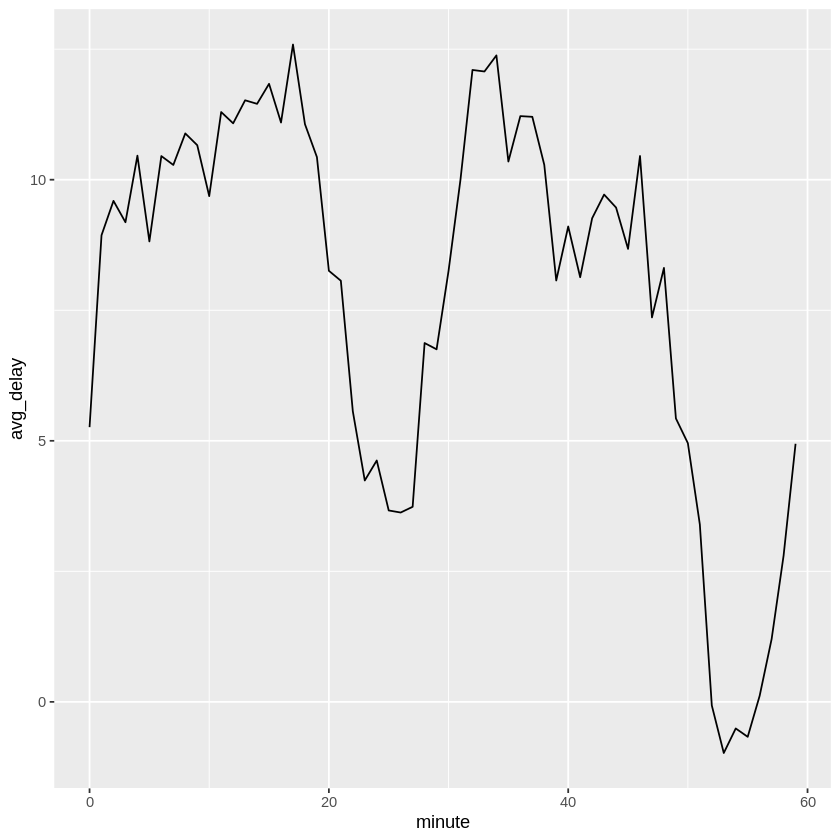

In [47]:
flights_dt %>% 
  mutate(minute = minute(dep_time)) %>% 
  group_by(minute) %>% 
  summarise(
    avg_delay = mean(arr_delay, na.rm = TRUE),
    n = n()) %>% 
  ggplot(aes(minute, avg_delay)) +
    geom_line()

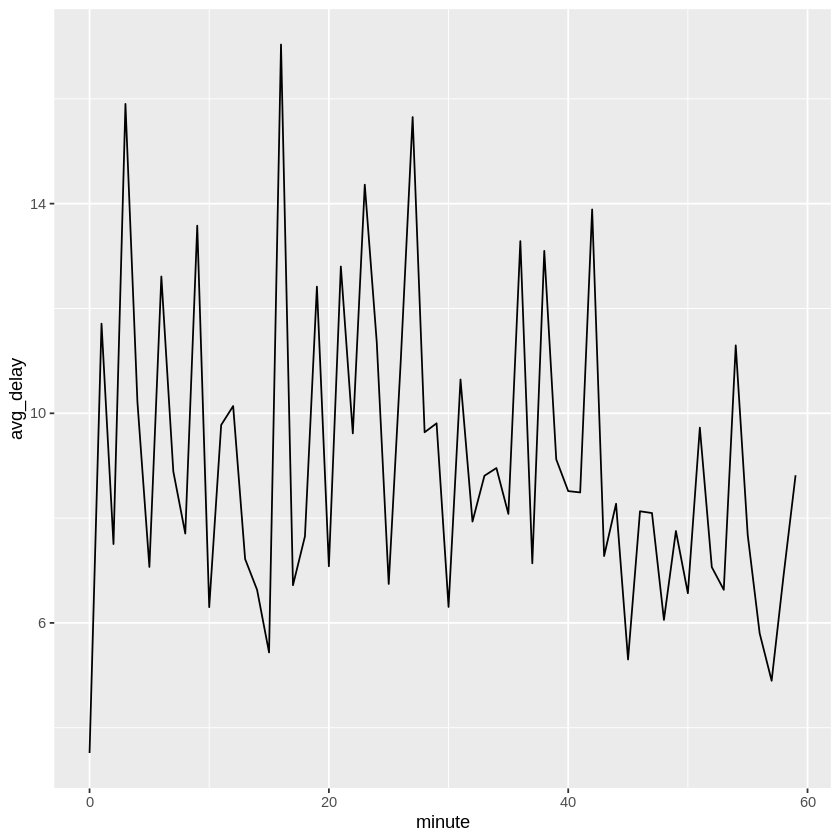

In [49]:
sched_dep <- flights_dt %>% 
  mutate(minute = minute(sched_dep_time)) %>% 
  group_by(minute) %>% 
  summarise(
    avg_delay = mean(arr_delay, na.rm = TRUE),
    n = n())

ggplot(sched_dep, aes(minute, avg_delay)) +
  geom_line()

In [50]:
(datetime <- ymd_hms("2016-07-08 12:34:56"))

year(datetime) <- 2020
datetime
month(datetime) <- 01
datetime
hour(datetime) <- hour(datetime) + 1
datetime


[1] "2016-07-08 12:34:56 UTC"

[1] "2020-07-08 12:34:56 UTC"

[1] "2020-01-08 12:34:56 UTC"

[1] "2020-01-08 13:34:56 UTC"

In [51]:
update(datetime, year = 2020, month = 2, mday = 2, hour = 2)


[1] "2020-02-02 02:34:56 UTC"

In [52]:
ymd("2015-02-01") %>% 
  update(mday = 30) %>% 
  update(hour = 400)

[1] "2015-03-18 16:00:00 UTC"

In [53]:
(h_age <- today() - ymd(19791014))
as.duration(h_age)



Time difference of 14770 days

[1] "1276128000s (~40.44 years)"

In [54]:
dseconds(15)
dminutes(10)
dhours(c(12, 24))
ddays(0:5)
dweeks(3)
dyears(1)


[1] "15s"

[1] "600s (~10 minutes)"

[1] "43200s (~12 hours)" "86400s (~1 days)"

[1] "0s"                "86400s (~1 days)"  "172800s (~2 days)"
[4] "259200s (~3 days)" "345600s (~4 days)" "432000s (~5 days)"

[1] "1814400s (~3 weeks)"

[1] "31536000s (~52.14 weeks)"

In [57]:
(tomorrow <- today() + ddays(1))

(last_year <- today() - dyears(1))


[1] "2020-03-23"

[1] "2019-03-23"

In [58]:
seconds(15)
minutes(10)
hours(c(12, 24))
days(7)
months(1:6)
weeks(3)
years(1)

[1] "15S"

[1] "10M 0S"

[1] "12H 0M 0S" "24H 0M 0S"

[1] "7d 0H 0M 0S"

[1] "1m 0d 0H 0M 0S" "2m 0d 0H 0M 0S" "3m 0d 0H 0M 0S" "4m 0d 0H 0M 0S"
[5] "5m 0d 0H 0M 0S" "6m 0d 0H 0M 0S"

[1] "21d 0H 0M 0S"

[1] "1y 0m 0d 0H 0M 0S"

In [61]:
# A leap year
one_pm <- ymd_hms("2016-03-12 13:00:00", tz = "America/New_York")

ymd("2016-01-01") + dyears(1)
ymd("2016-01-01") + years(1)

# Daylight Savings Time

one_pm + ddays(1) # add 24 hr

one_pm + days(1) # add 23 hr


[1] "2016-12-31"

[1] "2017-01-01"

[1] "2016-03-13 14:00:00 EDT"

[1] "2016-03-13 13:00:00 EDT"

In [63]:
# fix overnight flights
(flights_dt <- flights_dt %>% 
  mutate(
    overnight = arr_time < dep_time,
    arr_time = arr_time + days(overnight * 1),
    sched_arr_time = sched_arr_time + days(overnight * 1)
  )) %>%
head()

origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time,overnight
<chr>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>,<lgl>
EWR,IAH,2,11,2013-01-01 05:17:00,2013-01-01 05:15:00,2013-01-01 08:30:00,2013-01-01 08:19:00,227,FALSE
LGA,IAH,4,20,2013-01-01 05:33:00,2013-01-01 05:29:00,2013-01-01 08:50:00,2013-01-01 08:30:00,227,FALSE
JFK,MIA,2,33,2013-01-01 05:42:00,2013-01-01 05:40:00,2013-01-01 09:23:00,2013-01-01 08:50:00,160,FALSE
JFK,BQN,-1,-18,2013-01-01 05:44:00,2013-01-01 05:45:00,2013-01-01 10:04:00,2013-01-01 10:22:00,183,FALSE
LGA,ATL,-6,-25,2013-01-01 05:54:00,2013-01-01 06:00:00,2013-01-01 08:12:00,2013-01-01 08:37:00,116,FALSE
EWR,ORD,-4,12,2013-01-01 05:54:00,2013-01-01 05:58:00,2013-01-01 07:40:00,2013-01-01 07:28:00,150,FALSE


In [66]:
# intervals

next_year <- today() + years(1)
(today() %--% next_year) / ddays(1)
#> [1] 366 if next year is leap year

[1] 365

In [67]:
(today() %--% next_year) %/% days(1)


[1] 365

In [70]:
(next_year %--% today()) %/% days(1)


[1] -365